<b>Problem Statement:</b> <p> Climate change is a globally relevant, urgent, and multi-faceted issue heavily impacted by energy policy and infrastructure. Addressing climate change involves mitigation (i.e. mitigating greenhouse gas emissions) and adaptation (i.e. preparing for unavoidable consequences). Mitigation of GHG emissions requires changes to electricity systems, transportation, buildings, industry, and land use. </p>

<p>According to a report issued by the International Energy Agency (IEA), the lifecycle of buildings from construction to demolition were responsible for 37% of global energy-related and process-related CO2 emissions in 2020. Yet it is possible to drastically reduce the energy consumption of buildings by a combination of easy-to-implement fixes and state-of-the-art strategies. For example, retrofitted buildings can reduce heating and cooling energy requirements by 50-90 percent. Many of these energy efficiency measures also result in overall cost savings and yield other benefits, such as cleaner air for occupants. This potential can be achieved while maintaining the services that buildings provide.</p>

<b>Goal: </b> <p>
The goal of this competition is to predict the energy consumption using building characteristics and climate and weather variables. Accurate predictions of energy consumption can help policymakers target retrofitting efforts to maximize emissions reductions.</p>

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import random
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)


%matplotlib inline
sns.set(style="whitegrid", palette="muted", font_scale=1.5)
plt.rcParams["figure.figsize"] = (10, 5)

# Loading files and explorative analysis

In [2]:
data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
# check the size of train and test set
print("Number of train samples are", data.shape)
print("Number of test samples are", test_data.shape)

Number of train samples are (75757, 64)
Number of test samples are (9705, 63)


In [4]:
data.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [5]:
# columns in the dataset
data.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [6]:
# description of the dataset
data.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [7]:
# Check for missing data
cols_with_missing = [col for col in data.columns if data[col].isnull().any()]
miss_count = data.isna().sum()
miss_count.div(len(data))[cols_with_missing]

year_built                   0.024249
energy_star_rating           0.352561
direction_max_wind_speed     0.542287
direction_peak_wind_speed    0.551909
max_wind_speed               0.542287
days_with_fog                0.604512
dtype: float64

In [8]:
# Dropping variables with > 40% missing
data = data.drop(columns = ['direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog'])
test_data = test_data.drop(columns = ['direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog'])

### Cleaning up data types


In [9]:
categorical_cols = [
    c
    for c in data.columns
    if (1 < data[c].nunique()) & (data[c].dtype != np.number) & (data[c].dtype != int)
]
categorical_cols

<ipython-input-9-0d85a56154ca>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if (1 < data[c].nunique()) & (data[c].dtype != np.number) & (data[c].dtype != int)


['State_Factor', 'building_class', 'facility_type']

In [10]:
for col in categorical_cols:
    data[col] = data[col].astype("category")

In [11]:
num_col = data.select_dtypes("number").columns
num_col

Index(['Year_Factor', 'floor_area', 'year_built', 'energy_star_rating',
       'ELEVATION', 'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_3

## EDA

<AxesSubplot:xlabel='site_eui', ylabel='Density'>

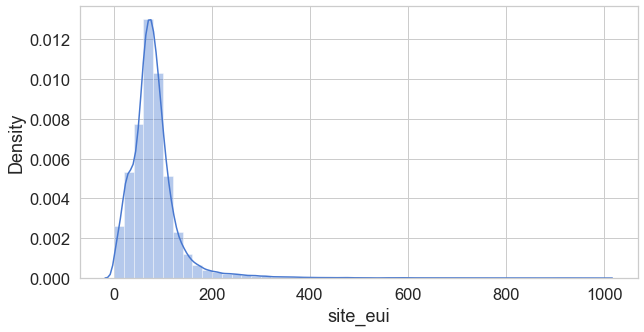

In [12]:
#  distribution of the target variable
sns.distplot(data["site_eui"])

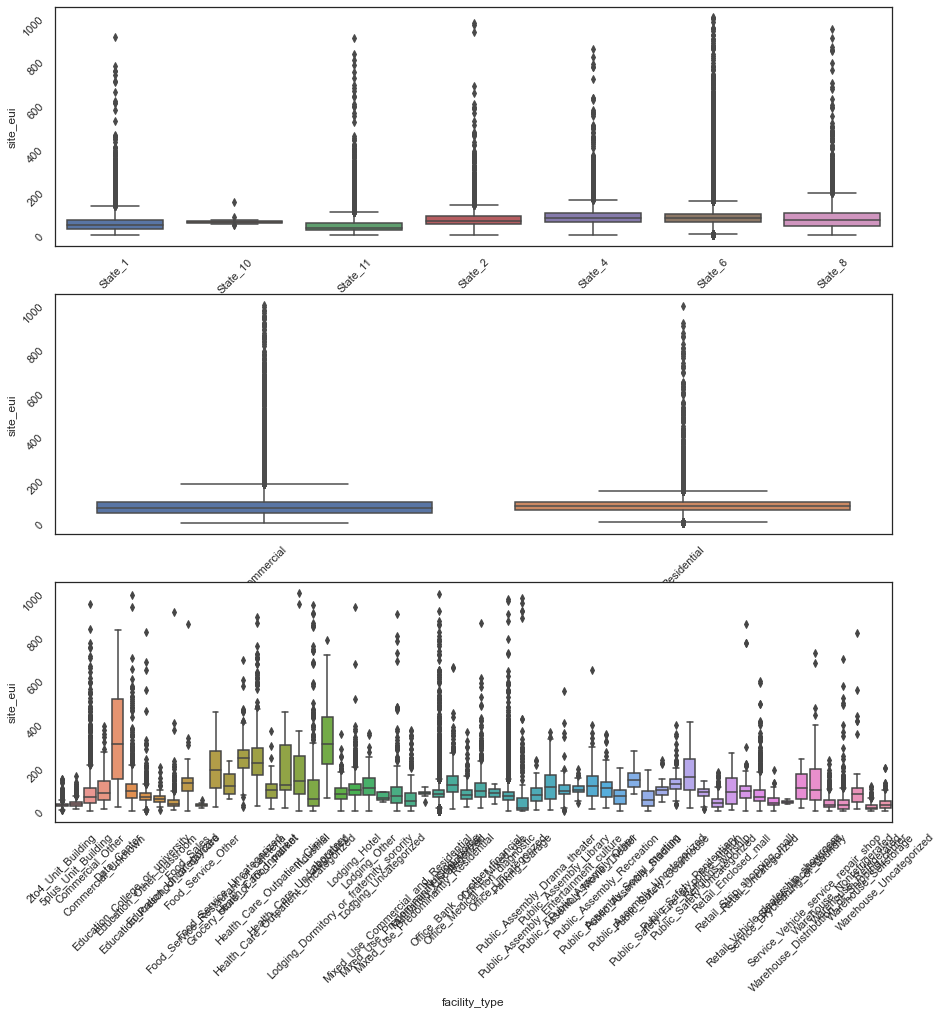

In [13]:
#Relationship between target and the categorical variables.
plt.figure(figsize=(15, 15))
sns.set(style="white")
i = 1
for col in categorical_cols:
    plt.subplot(3, 1, i)
    ax = sns.boxplot(data=data, x=col, y="site_eui")
    i = i + 1
    ax.tick_params(labelrotation=45)
plt.show()

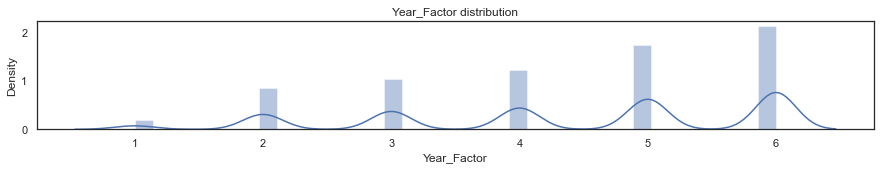

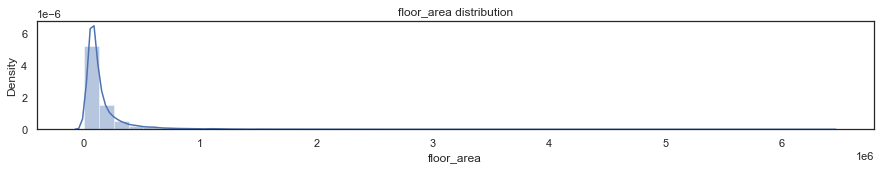

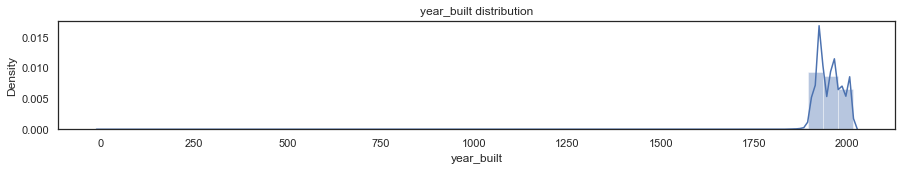

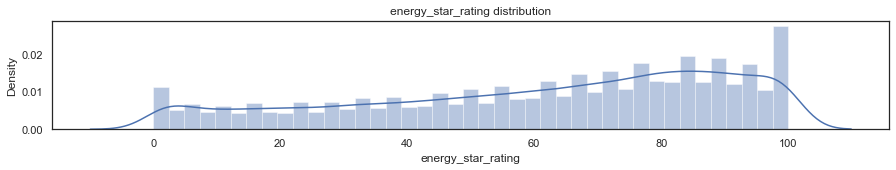

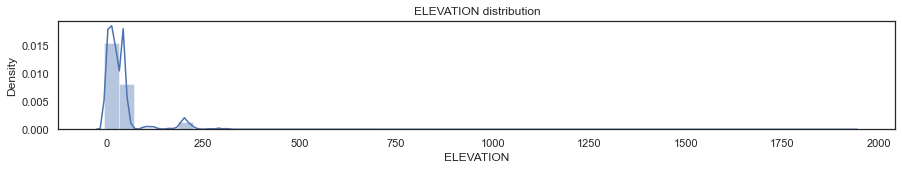

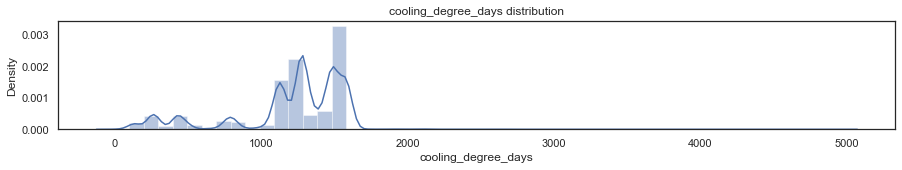

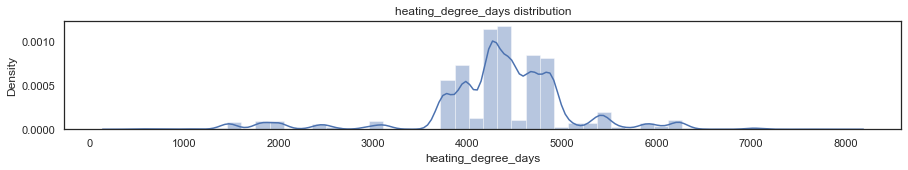

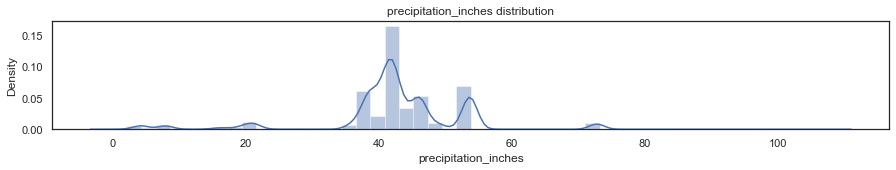

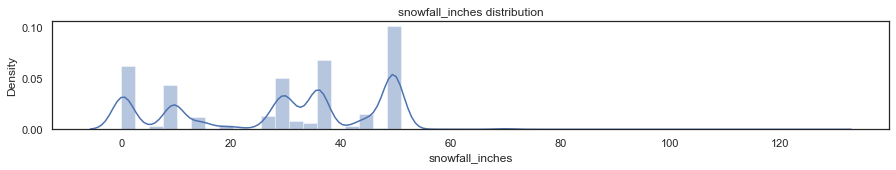

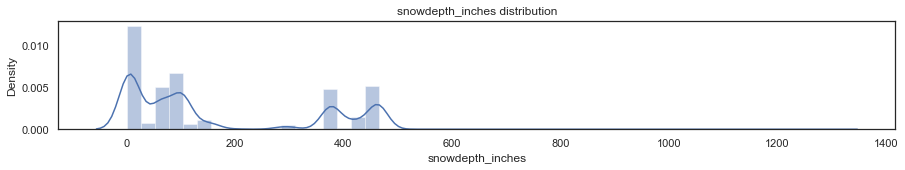

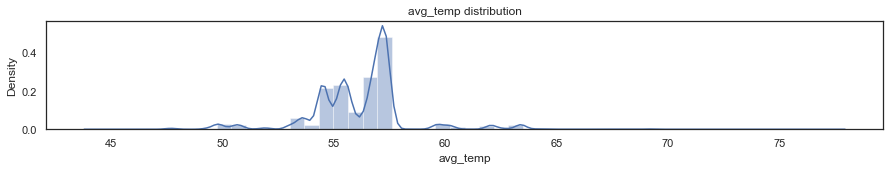

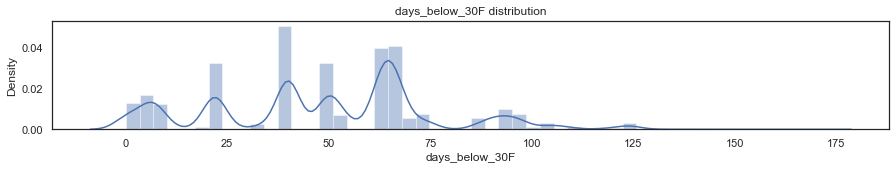

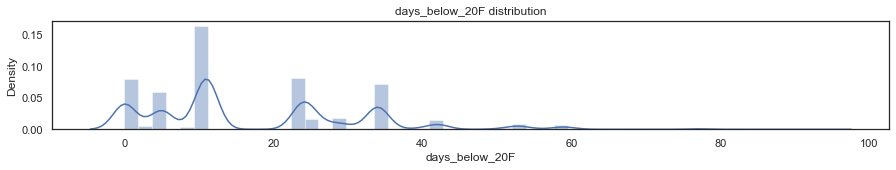

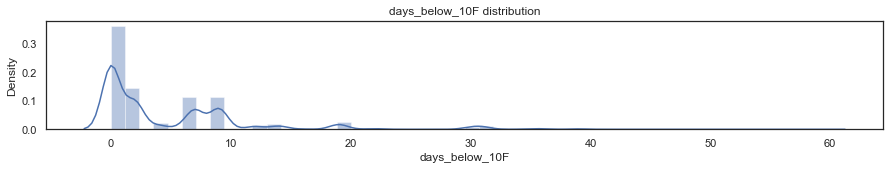

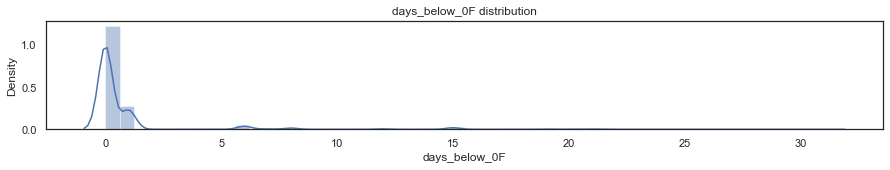

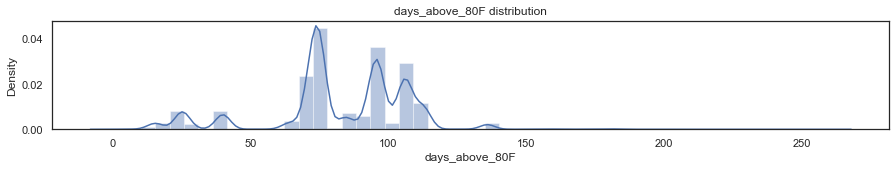

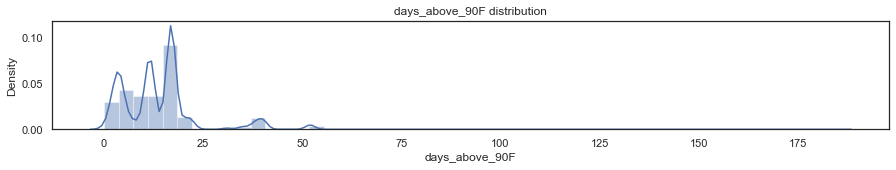

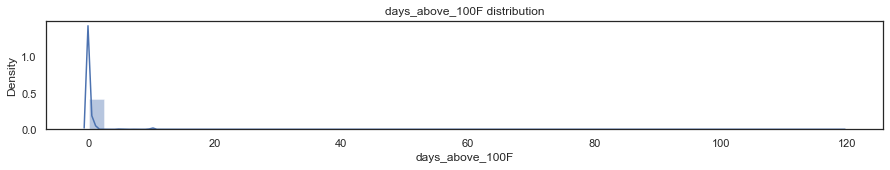

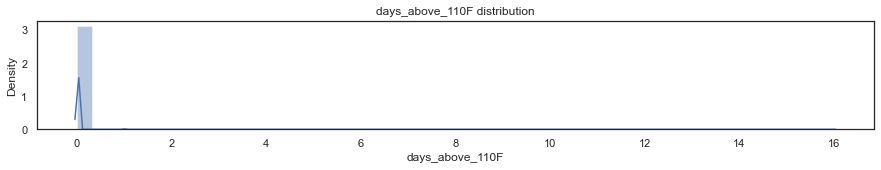

KeyError: 'direction_max_wind_speed'

<Figure size 1080x144 with 0 Axes>

In [14]:
#relationship between target and the numerical variables.
cols = [
    "Year_Factor",
    "floor_area",
    "year_built",
    "energy_star_rating",
    "ELEVATION",
    "cooling_degree_days",
    "heating_degree_days",
    "precipitation_inches",
    "snowfall_inches",
    "snowdepth_inches",
    "avg_temp",
    "days_below_30F",
    "days_below_20F",
    "days_below_10F",
    "days_below_0F",
    "days_above_80F",
    "days_above_90F",
    "days_above_100F",
    "days_above_110F",
    "direction_max_wind_speed",
    "direction_peak_wind_speed",
    "max_wind_speed",
    "days_with_fog",
]

for col in cols:
    plt.figure(figsize=(15, 2))
    sns.distplot(data[col], kde=True)
    plt.title(col + " distribution")
    plt.show()

<AxesSubplot:xlabel='facility_type', ylabel='energy_star_rating'>

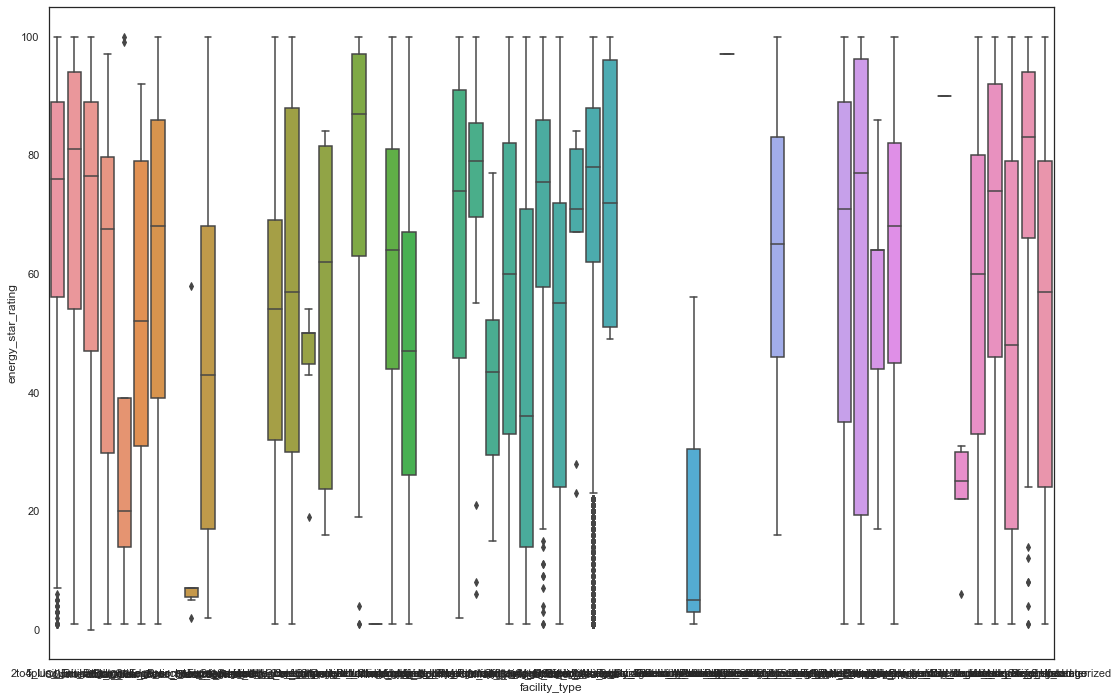

In [17]:
#Relationship between facility type and enerygy_star_rating
plt.figure(figsize=(18,12))
sns.boxplot(x='facility_type', y='energy_star_rating', data=data)

['january_avg_temp',
 'february_min_temp',
 'february_avg_temp',
 'february_max_temp',
 'march_min_temp',
 'march_avg_temp',
 'april_min_temp',
 'july_avg_temp',
 'august_min_temp',
 'august_avg_temp',
 'september_min_temp',
 'september_avg_temp',
 'december_avg_temp',
 'cooling_degree_days',
 'heating_degree_days',
 'snowdepth_inches',
 'avg_temp',
 'days_below_30F',
 'days_below_20F',
 'days_below_10F',
 'days_above_80F']

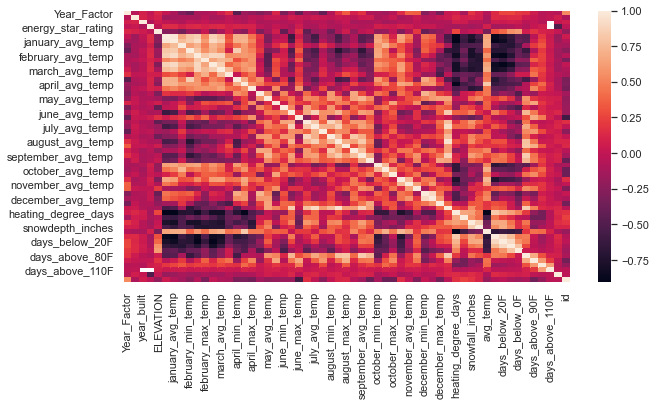

In [18]:
#investigate the correlations between data with heatmap. 
data_cor = data.corr()

sns.heatmap(data_cor)
data_df_upper = data_cor.where(
    np.triu(np.ones(data_cor.shape, dtype=int), k=1).astype(bool)
)
cor= [col for col in data_df_upper.columns if any(abs(data_df_upper[col]) >= 0.8)]

cor

## Data preparation

In [19]:
# see how much na values in each facility_type
data[data["energy_star_rating"].isna()].groupby('facility_type')['id'].count()

facility_type
2to4_Unit_Building                             249
5plus_Unit_Building                            220
Commercial_Other                              1488
Commercial_Unknown                              73
Data_Center                                     18
Education_College_or_university                991
Education_Other_classroom                      155
Education_Preschool_or_daycare                 108
Education_Uncategorized                        702
Food_Sales                                      11
Food_Service_Other                              17
Food_Service_Restaurant_or_cafeteria            64
Food_Service_Uncategorized                      18
Grocery_store_or_food_market                    43
Health_Care_Inpatient                           60
Health_Care_Outpatient_Clinic                   50
Health_Care_Outpatient_Uncategorized            30
Health_Care_Uncategorized                       51
Industrial                                     341
Laboratory       

In [20]:
#calculate mean for missing facility_type 
energy_dict = data.groupby("facility_type")["energy_star_rating"].mean().to_frame().to_dict()['energy_star_rating']
energy_dict['Education_Preschool_or_daycare']=(energy_dict.get('Education_College_or_university')+energy_dict.get('Education_Other_classroom')+energy_dict.get('Education_Uncategorized'))/3
energy_dict['Food_Service_Other']= energy_dict.get('Food_Sales')
energy_dict['Food_Service_Restaurant_or_cafeteria']=  energy_dict.get('Food_Sales')
energy_dict['Food_Service_Uncategorized']=  energy_dict.get('Food_Sales')
energy_dict['Health_Care_Uncategorized']=  (energy_dict.get('Health_Care_Inpatient')+energy_dict.get('Health_Care_Outpatient_Clinic')+energy_dict.get('Health_Care_Outpatient_Uncategorized'))/3
energy_dict['Lodging_Other']=  (energy_dict.get('Lodging_Dormitory_or_fraternity_sorority')+energy_dict.get('Lodging_Hotel'))/2
energy_dict['Lodging_Uncategorized']=  (energy_dict.get('Lodging_Dormitory_or_fraternity_sorority')+energy_dict.get('Lodging_Hotel'))/2
energy_dict['Public_Assembly_Drama_theater']=  (energy_dict.get('Public_Assembly_Other')+energy_dict.get('Public_Assembly_Social_meeting'))/2
energy_dict['Public_Assembly_Library']=  (energy_dict.get('Public_Assembly_Other')+energy_dict.get('Public_Assembly_Social_meeting'))/2
energy_dict['Public_Assembly_Entertainment_culture']=  (energy_dict.get('Public_Assembly_Other')+energy_dict.get('Public_Assembly_Social_meeting'))/2
energy_dict['Public_Assembly_Movie_Theater']=  (energy_dict.get('Public_Assembly_Other')+energy_dict.get('Public_Assembly_Social_meeting'))/2
energy_dict['Public_Assembly_Recreation']=  (energy_dict.get('Public_Assembly_Other')+energy_dict.get('Public_Assembly_Social_meeting'))/2
energy_dict['Public_Assembly_Stadium']=  (energy_dict.get('Public_Assembly_Other')+energy_dict.get('Public_Assembly_Social_meeting'))/2
energy_dict['Public_Assembly_Uncategorized']=  (energy_dict.get('Public_Assembly_Other')+energy_dict.get('Public_Assembly_Social_meeting'))/2
energy_dict['Public_Safety_Fire_or_police_station']=  energy_dict.get('Public_Safety_Courthouse')
energy_dict['Public_Safety_Penitentiary']=  energy_dict.get('Public_Safety_Courthouse')
energy_dict['Public_Safety_Uncategorized']= energy_dict.get('Public_Safety_Courthouse')
energy_dict['Retail_Vehicle_dealership_showroom']=  (energy_dict.get('Retail_Strip_shopping_mall')+energy_dict.get('Retail_Strip_shopping_mall')+energy_dict.get('Retail_Uncategorized'))/3
energy_dict['Service_Drycleaning_or_Laundry']=  (energy_dict.get('Service_Uncategorized')+energy_dict.get('Service_Vehicle_service_repair_shop'))/2


In [21]:
# fill energy_star_rating
    facility_type = ['2to4_Unit_Building', '5plus_Unit_Building',
                  'Commercial_Other', 'Commercial_Unknown', 'Data_Center',
                  'Education_College_or_university',
                  'Education_Other_classroom',
                  'Education_Preschool_or_daycare', 'Education_Uncategorized',
                  'Food_Sales', 'Food_Service_Other',
                  'Food_Service_Restaurant_or_cafeteria',
                  'Food_Service_Uncategorized', 'Grocery_store_or_food_market',
                  'Health_Care_Inpatient', 'Health_Care_Outpatient_Clinic',
                  'Health_Care_Outpatient_Uncategorized',
                  'Health_Care_Uncategorized', 'Industrial', 'Laboratory',
                  'Lodging_Dormitory_or_fraternity_sorority', 'Lodging_Hotel',
                  'Lodging_Other', 'Lodging_Uncategorized',
                  'Mixed_Use_Commercial_and_Residential',
                  'Mixed_Use_Predominantly_Commercial',
                  'Mixed_Use_Predominantly_Residential',
                  'Multifamily_Uncategorized', 'Nursing_Home',
                  'Office_Bank_or_other_financial',
                  'Office_Medical_non_diagnostic', 'Office_Mixed_use',
                  'Office_Uncategorized', 'Parking_Garage',
                  'Public_Assembly_Drama_theater',
                  'Public_Assembly_Entertainment_culture',
                  'Public_Assembly_Library', 'Public_Assembly_Movie_Theater',
                  'Public_Assembly_Other', 'Public_Assembly_Recreation',
                  'Public_Assembly_Social_meeting', 'Public_Assembly_Stadium',
                  'Public_Assembly_Uncategorized', 'Public_Safety_Courthouse',
                  'Public_Safety_Fire_or_police_station',
                  'Public_Safety_Penitentiary', 'Public_Safety_Uncategorized',
                  'Religious_worship', 'Retail_Enclosed_mall',
                  'Retail_Strip_shopping_mall', 'Retail_Uncategorized',
                  'Retail_Vehicle_dealership_showroom',
                  'Service_Drycleaning_or_Laundry', 'Service_Uncategorized',
                  'Service_Vehicle_service_repair_shop',
                  'Warehouse_Distribution_or_Shipping_center',
                  'Warehouse_Nonrefrigerated', 'Warehouse_Refrigerated',
                  'Warehouse_Selfstorage', 'Warehouse_Uncategorized']

for i in facility_type:
    v = energy_dict[i]
    index = data[data['facility_type'] == i].index
    data.loc[index,'energy_star_rating'] = data.loc[index,'energy_star_rating'].apply(lambda x: v if np.isnan(x) else x)
    
for i in facility_type:
    v = energy_dict[i]
    index = test_data[test_data['facility_type'] == i].index
    test_data.loc[index,'energy_star_rating'] = test_data.loc[index,'energy_star_rating'].apply(lambda x: v if np.isnan(x) else x)    

In [22]:
#Encode categorical columns
data["State_Factor_encoded"] = data.groupby("State_Factor")["site_eui"].transform("mean")
data["building_class_encoded"] = data.groupby("building_class")["site_eui"].transform("mean")
data["facility_type_encoded"] = data.groupby("facility_type")["site_eui"].transform("mean")

di = data[["State_Factor","State_Factor_encoded"]].drop_duplicates().set_index('State_Factor').to_dict()['State_Factor_encoded']
data= data.replace({"State_Factor":di})
test_data= test_data.replace({"State_Factor":di})

di = data[["building_class","building_class_encoded"]].drop_duplicates().set_index('building_class').to_dict()['building_class_encoded']
data= data.replace({"building_class":di})
test_data= test_data.replace({"building_class":di})

di = data[["facility_type","facility_type_encoded"]].drop_duplicates().set_index('facility_type').to_dict()['facility_type_encoded']
data= data.replace({"facility_type":di})
test_data= test_data.replace({"facility_type":di})

data = data.drop(['State_Factor_encoded', 'building_class_encoded', 'facility_type_encoded'], axis=1)



In [23]:
#Transform temperature 

train_temp = data.iloc[:, 8:44]

test_temp = test_data.iloc[:, 8:44]

def drop(df, *features):
    for i in features:
        df.drop(i, axis=1, inplace=True)

def temp_to_seasons(df):
    to_drop = []   
    
    # drop all the min and max columns
    for i in df.columns:
        if 'avg' not in i:
            to_drop.append(i)
    drop(df, to_drop)                        
    
    # grouping in seasons
    df['spring'] = (df['march_avg_temp'] + df['april_avg_temp'] + df['may_avg_temp'])/3
    df['summer'] = (df['june_avg_temp'] + df['july_avg_temp'] + df['august_avg_temp'])/3
    df['fall'] = (df['september_avg_temp'] + df['october_avg_temp'] + df['november_avg_temp'])/3
    df['winter'] = (df['december_avg_temp'] + df['january_avg_temp'] + df['february_avg_temp'])/3
    
    #dropping the avg columns
    to_drop = []
    for i in df.columns:
        if 'avg' in i:
            to_drop.append(i)
    drop(df, to_drop)
    
temp_to_seasons(train_temp)
temp_to_seasons(test_temp)

data=data.drop(data.iloc[:, 8:44], axis = 1)
test_data=test_data.drop(test_data.iloc[:, 8:44], axis = 1)

data = pd.concat([data,train_temp], axis=1)
test_data = pd.concat([test_data,test_temp], axis=1)

In [24]:
# caculate the percentage of cooling days and heating days
data['days'] = data['cooling_degree_days'] + data['heating_degree_days']
data['cooling_degree_days_pct'] = data['cooling_degree_days']/data['days']
data['heating_degree_days_pct'] = data['heating_degree_days']/data['days']

test_data['days'] = test_data['cooling_degree_days'] + test_data['heating_degree_days']
test_data['cooling_degree_days_pct'] = test_data['cooling_degree_days']/test_data['days']
test_data['heating_degree_days_pct'] = test_data['heating_degree_days']/test_data['days']

col = ['cooling_degree_days', 'heating_degree_days','days']
data.drop(col, axis=1, inplace=True)
test_data.drop(col, axis=1, inplace=True)

In [25]:
# concat days below and days above certain degrees
data['days_below_F'] = data['days_below_30F']+data['days_below_20F']+data['days_below_10F']+data['days_below_0F']
data['days_above_F'] = data['days_above_80F']+data['days_above_90F']+data['days_above_100F']+data['days_above_110F']

test_data['days_below_F'] = test_data['days_below_30F']+test_data['days_below_20F']+test_data['days_below_10F']+test_data['days_below_0F']
test_data['days_above_F'] = test_data['days_above_80F']+test_data['days_above_90F']+test_data['days_above_100F']+test_data['days_above_110F']

col = ['days_below_30F','days_below_20F','days_below_10F','days_below_0F',
        'days_above_80F','days_above_90F','days_above_100F','days_above_110F']
data.drop(col ,axis=1,inplace=True)
test_data.drop(col,axis=1,inplace=True)

In [26]:
# snowfall_inches and snowdepth_inches are highly correlated, drop one of them
col = ['snowdepth_inches']
data.drop(col, axis=1, inplace=True)
test_data.drop(col, axis=1, inplace=True)

In [27]:
# year_built: replace with current year.
data["year_built"] = data["year_built"].replace(np.nan, 2022)

## for test data
test_data["year_built"] = test_data["year_built"].replace(np.nan, 2022)

data['year_built'] = data['year_built'].apply(lambda x: 2022 if x<1600 else x)
test_data['year_built'] = test_data['year_built'].apply(lambda x: 2022 if x<1600 else x)


In [28]:
#building age
def age(df):
    if type(df['year_built']) == float and pd.isna(df['year_built']):
        return 0
    else:
        return (2022 - df['year_built'])
    
data['age'] = data.apply(age, axis=1)
test_data['age'] = test_data.apply(age, axis=1)

#drop year built
data = data.drop(['year_built'], axis=1)
test_data=test_data.drop(['year_built'], axis=1)

In [29]:
#Clean other columns
data['ELEVATION'] = data['ELEVATION'].apply(lambda x: 1 if x<0 else x)
data['ELEVATION_log'] = round(np.log(data['ELEVATION']), 2)
data['floor_area_log'] = round(np.log(data['floor_area']), 2)

test_data['ELEVATION'] = test_data['ELEVATION'].apply(lambda x: 1 if x<0 else x)
test_data['ELEVATION_log'] = round(np.log(test_data['ELEVATION']), 2)
test_data['floor_area_log'] = round(np.log(test_data['floor_area']), 2)

#drop columns 
data = data.drop(['ELEVATION', 'floor_area'], axis=1)
test_data = test_data.drop(['ELEVATION', 'floor_area'], axis=1)

In [30]:
# rechecking null values again
cols_with_missing = [col for col in data.columns if data[col].isnull().any()]
cols_with_missing

[]

In [31]:
data.head()

,Year_Factor,State_Factor,building_class,facility_type,energy_star_rating,precipitation_inches,snowfall_inches,avg_temp,site_eui,id,...,summer,fall,winter,cooling_degree_days_pct,heating_degree_days_pct,days_below_F,days_above_F,age,ELEVATION_log,floor_area_log
0,1,62.196194,85.755239,241.135162,11.0,16.59,0.0,56.972603,248.682615,0,...,61.795699,60.48871,50.12116,0.037398,0.962602,0,14,80.0,0.88,11.02
1,1,62.196194,85.755239,39.559542,45.0,16.59,0.0,56.972603,26.500150,1,...,61.795699,60.48871,50.12116,0.037398,0.962602,0,14,67.0,0.59,12.52
2,1,62.196194,85.755239,100.965937,97.0,16.59,0.0,56.972603,24.693619,2,...,61.795699,60.48871,50.12116,0.037398,0.962602,0,14,71.0,0.59,12.54
3,1,62.196194,85.755239,69.441531,46.0,16.59,0.0,56.972603,48.406926,3,...,61.795699,60.48871,50.12116,0.037398,0.962602,0,14,42.0,0.59,10.92
4,1,62.196194,85.755239,38.209399,100.0,16.59,0.0,56.972603,3.899395,4,...,61.795699,60.48871,50.12116,0.037398,0.962602,0,14,37.0,0.88,11.10


# Model training

In [32]:
#RMSE is the evaluation metric
import math

def rmse(y_test, y_pred):
    return math.sqrt(mean_squared_error(y_test, y_pred))

In [33]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import lightgbm as lgb
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [34]:
no_use=['site_eui','id']

target='site_eui'

categorical=['Year_Factor','State_Factor','building_class','facility_type']

features=[x for x in data.columns if x not in no_use]
features

['Year_Factor',
 'State_Factor',
 'building_class',
 'facility_type',
 'energy_star_rating',
 'precipitation_inches',
 'snowfall_inches',
 'avg_temp',
 'spring',
 'summer',
 'fall',
 'winter',
 'cooling_degree_days_pct',
 'heating_degree_days_pct',
 'days_below_F',
 'days_above_F',
 'age',
 'ELEVATION_log',
 'floor_area_log']

In [35]:
def internal_lgb(data,test,features,categorical,target):

    kfold=GroupKFold(n_splits=6)


    i=1

    r=[]
    
    pred_test=np.zeros(len(test))

    importance=pd.DataFrame()

    importance['variable']=features
    
    
    cat_ind=[features.index(x) for x in categorical if x in features]
    
    dict_cat={}
    
    categorical_numerical = data[categorical].dropna().select_dtypes(include=np.number).columns.tolist()
    
    categorical_transform=[x for x in categorical if x not in categorical_numerical]
    
    for l in categorical_transform:
        le = preprocessing.LabelEncoder()
        le.fit(list(data[l].dropna())+list(test[l].dropna()))

        dict_cat[l]=le

        data.loc[~data[l].isnull(),l]=le.transform(data.loc[~data[l].isnull(),l])
        test.loc[~test[l].isnull(),l]=le.transform(test.loc[~test[l].isnull(),l])
        
        

    for train_index,test_index in kfold.split(data,data[target],data['Year_Factor']):

        lgb_data_train = lgb.Dataset(data.loc[train_index,features].values,data.loc[train_index,target].values)
        lgb_data_eval = lgb.Dataset(data.loc[test_index,features].values,data.loc[test_index,target].values, reference=lgb_data_train)

        params = {
            'task': 'train',
            'boosting_type': 'gbdt',
            'objective': 'regression',
            'metric': { 'rmse'},
            "max_depth":-1,
            "num_leaves":52,
            'learning_rate': 0.1,
            "min_child_samples": 100,
            'feature_fraction': 0.9,
            "bagging_freq":1,
            'bagging_fraction': 0.9,
            "lambda_l1":10,
            "lambda_l2":10,
            "scale_pos_weight":30,
            'min_data_per_group':500,
            'verbose': 1           
        }


        model = lgb.train(params,
                           lgb_data_train,
                           num_boost_round=99990,
                           valid_sets=lgb_data_eval,
                           early_stopping_rounds=140,
                           verbose_eval=250,
                           categorical_feature=cat_ind
                          )

        importance['gain_'+str(i)]=model.feature_importance(importance_type="gain")


        data.loc[test_index,'estimator']=model.predict(data.loc[test_index,features].values, num_iteration=model.best_iteration)
        data.loc[train_index,'estimator_train_'+str(i)] = model.predict(data.loc[train_index,features].values, num_iteration=model.best_iteration)
        
        pred_test=pred_test+model.predict(test[features].values, num_iteration=model.best_iteration)

        print ("Fold_"+str(i))
        a= (mean_squared_error(data.loc[test_index,target],data.loc[test_index,'estimator']))**0.5
        r.append(a)
        print (a)
        print ("")

        i=i+1
        
    for l in categorical_transform:

            data.loc[~data[l].isnull(),l]=dict_cat[l].inverse_transform(data.loc[~data[l].isnull(),l].astype(int))
            
            test.loc[~test[l].isnull(),l]=dict_cat[l].inverse_transform(test.loc[~test[l].isnull(),l].astype(int))
            
    importance["gain_avg"]=importance[["gain_1","gain_2","gain_3","gain_4","gain_5"]].mean(axis=1)
    importance=importance.sort_values("gain_avg",ascending=False).reset_index(drop=True)
    
    pred_test=(pred_test/6)
    
    
    oof=(mean_squared_error(data[target],data['estimator']))**0.5
    
    print (oof)
    print ("mean: "+str(np.mean(np.array(r))))
    print ("std: "+str(np.std(np.array(r))))
    
    dict_result={}
    
    dict_result['importance']=importance
    dict_result['prediction']=pred_test
    dict_result['estimator']=data['estimator']
    dict_result['estimator_train_1']=data['estimator_train_1']
    dict_result['estimator_train_2']=data['estimator_train_2']
    dict_result['estimator_train_3']=data['estimator_train_3']
    dict_result['estimator_train_4']=data['estimator_train_4']
    dict_result['estimator_train_5']=data['estimator_train_5']
    dict_result['estimator_train_6']=data['estimator_train_6']
    dict_result['rmse']=r
    
    
    
    return dict_result

In [36]:
dict_result=internal_lgb(data=data,test=test_data,features=features,categorical=categorical,target=target)

/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [0, 1, 2, 3]
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000816 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1836
[LightGBM] [Info] Number of data points in the train set: 53308, number of used features: 19
[LightGBM] [Info] Start training from score 83.961575
Training until validation scores don't improve for 140 rounds
[250]	valid_0's rmse: 40.2885
[500]	valid_0's rmse: 39.9591
[750]	valid_0's rmse: 39.7619
Early stopping, best iteration is:
[754]	valid_0's rmse: 39.7532
Fold_1
39.75319701365044

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1812
[LightGBM] [Info] Number of data points in the train set: 57449, number of used feat

/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [0, 1, 2, 3]
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/

[250]	valid_0's rmse: 35.5643
[500]	valid_0's rmse: 34.2526
[750]	valid_0's rmse: 33.4969
[1000]	valid_0's rmse: 33.0303
[1250]	valid_0's rmse: 32.7786
[1500]	valid_0's rmse: 32.4935
[1750]	valid_0's rmse: 32.3488
[2000]	valid_0's rmse: 32.182
[2250]	valid_0's rmse: 32.0515
[2500]	valid_0's rmse: 32.021
Early stopping, best iteration is:
[2392]	valid_0's rmse: 31.9963
Fold_2
31.996255774145833

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1587
[LightGBM] [Info] Number of data points in the train set: 62811, number of used features: 19
[LightGBM] [Info] Start training from score 81.676424
Training until validation scores don't improve for 140 rounds


/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [0, 1, 2, 3]
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/

[250]	valid_0's rmse: 39.5951
[500]	valid_0's rmse: 38.4483
[750]	valid_0's rmse: 37.9859
[1000]	valid_0's rmse: 37.8256
Early stopping, best iteration is:
[1034]	valid_0's rmse: 37.8022
Fold_3
37.80224773977693

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1582
[LightGBM] [Info] Number of data points in the train set: 64878, number of used features: 19
[LightGBM] [Info] Start training from score 82.088447
Training until validation scores don't improve for 140 rounds


/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [0, 1, 2, 3]
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/

[250]	valid_0's rmse: 48.1724
[500]	valid_0's rmse: 47.2039
[750]	valid_0's rmse: 46.6257
[1000]	valid_0's rmse: 46.3271
[1250]	valid_0's rmse: 46.1776
[1500]	valid_0's rmse: 46.0791
[1750]	valid_0's rmse: 46.0196
[2000]	valid_0's rmse: 45.9622
[2250]	valid_0's rmse: 45.914
Early stopping, best iteration is:
[2169]	valid_0's rmse: 45.8957
Fold_4
45.89571067894069

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1775
[LightGBM] [Info] Number of data points in the train set: 66699, number of used features: 19
[LightGBM] [Info] Start training from score 82.567760
Training until validation scores don't improve for 140 rounds


/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [0, 1, 2, 3]
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/

[250]	valid_0's rmse: 44.3323
[500]	valid_0's rmse: 43.5917
[750]	valid_0's rmse: 43.1578
[1000]	valid_0's rmse: 42.9171
[1250]	valid_0's rmse: 42.6377
[1500]	valid_0's rmse: 42.4983
[1750]	valid_0's rmse: 42.4744
Early stopping, best iteration is:
[1848]	valid_0's rmse: 42.383
Fold_5
42.3829785514303

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1933
[LightGBM] [Info] Number of data points in the train set: 73640, number of used features: 19
[LightGBM] [Info] Start training from score 82.261660
Training until validation scores don't improve for 140 rounds


/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [0, 1, 2, 3]
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/

[250]	valid_0's rmse: 57.6411
[500]	valid_0's rmse: 56.0598
[750]	valid_0's rmse: 55.2296
[1000]	valid_0's rmse: 54.7389
[1250]	valid_0's rmse: 54.3241
[1500]	valid_0's rmse: 54.0746
[1750]	valid_0's rmse: 53.96
[2000]	valid_0's rmse: 53.8557
[2250]	valid_0's rmse: 53.767
[2500]	valid_0's rmse: 53.6404
[2750]	valid_0's rmse: 53.6076
Early stopping, best iteration is:
[2831]	valid_0's rmse: 53.5783
Fold_6
53.57832937794235

39.463811383906055
mean: 41.901453189314424
std: 6.733830297332035


<BarContainer object of 19 artists>

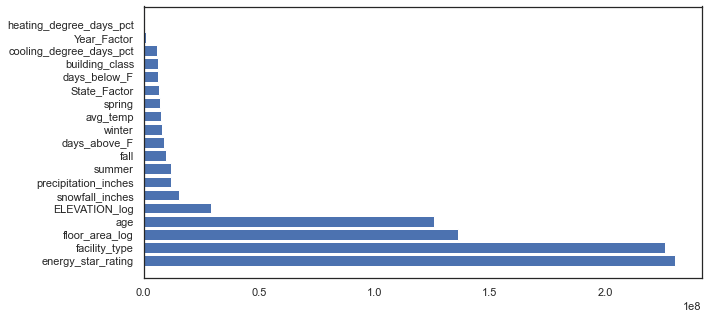

In [37]:
#feature importance
new = dict_result['importance'].sort_values('gain_avg', ascending=False).head(20)
plt.barh('variable','gain_avg',data=new)

In [38]:
temp=dict_result['importance']
features_selected=temp['variable'].tolist()[0:4]

In [39]:
features_selected

['energy_star_rating', 'facility_type', 'floor_area_log', 'age']

In [40]:
dict_result_2=internal_lgb(data=data,test=test_data,features=features_selected,categorical=categorical,target=target)

/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [1]
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/anaco

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 611
[LightGBM] [Info] Number of data points in the train set: 53308, number of used features: 4
[LightGBM] [Info] Start training from score 83.961575
Training until validation scores don't improve for 140 rounds
[250]	valid_0's rmse: 38.8858
[500]	valid_0's rmse: 37.7234
[750]	valid_0's rmse: 37.1874
[1000]	valid_0's rmse: 36.8315
[1250]	valid_0's rmse: 36.5941
[1500]	valid_0's rmse: 36.3564
[1750]	valid_0's rmse: 36.2081
[2000]	valid_0's rmse: 36.0875
[2250]	valid_0's rmse: 36.029
[2500]	valid_0's rmse: 35.9639
[2750]	valid_0's rmse: 35.9312
[3000]	valid_0's rmse: 35.8948
[3250]	valid_0's rmse: 35.8766
Early stopping, best iteration is:
[3130]	valid_0's rmse: 35.8692
Fold_1
35.86916240539336

[LightGBM] [Warning] Auto-choosing col-

/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [1]
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/anaco

[250]	valid_0's rmse: 34.6283
[500]	valid_0's rmse: 32.5691
[750]	valid_0's rmse: 31.3313
[1000]	valid_0's rmse: 30.4718
[1250]	valid_0's rmse: 29.8307
[1500]	valid_0's rmse: 29.3229
[1750]	valid_0's rmse: 28.8993
[2000]	valid_0's rmse: 28.566
[2250]	valid_0's rmse: 28.2504
[2500]	valid_0's rmse: 28.0066
[2750]	valid_0's rmse: 27.7676
[3000]	valid_0's rmse: 27.5532
[3250]	valid_0's rmse: 27.3854
[3500]	valid_0's rmse: 27.2501
[3750]	valid_0's rmse: 27.1155
[4000]	valid_0's rmse: 26.9925
[4250]	valid_0's rmse: 26.8697
[4500]	valid_0's rmse: 26.7519
[4750]	valid_0's rmse: 26.6888
[5000]	valid_0's rmse: 26.5756
[5250]	valid_0's rmse: 26.498
[5500]	valid_0's rmse: 26.4448
[5750]	valid_0's rmse: 26.3729
[6000]	valid_0's rmse: 26.3094
[6250]	valid_0's rmse: 26.2672
[6500]	valid_0's rmse: 26.2054
[6750]	valid_0's rmse: 26.1737
[7000]	valid_0's rmse: 26.1366
[7250]	valid_0's rmse: 26.0824
[7500]	valid_0's rmse: 26.0554
[7750]	valid_0's rmse: 26.0418
[8000]	valid_0's rmse: 25.9929
[8250]	valid_

/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [1]
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/anaco

[250]	valid_0's rmse: 38.5242
[500]	valid_0's rmse: 36.448
[750]	valid_0's rmse: 35.3504
[1000]	valid_0's rmse: 34.6807
[1250]	valid_0's rmse: 34.1326
[1500]	valid_0's rmse: 33.7324
[1750]	valid_0's rmse: 33.4189
[2000]	valid_0's rmse: 33.1101
[2250]	valid_0's rmse: 32.8624
[2500]	valid_0's rmse: 32.6576
[2750]	valid_0's rmse: 32.4716
[3000]	valid_0's rmse: 32.3081
[3250]	valid_0's rmse: 32.1557
[3500]	valid_0's rmse: 32.0068
[3750]	valid_0's rmse: 31.8809
[4000]	valid_0's rmse: 31.7685
[4250]	valid_0's rmse: 31.6502
[4500]	valid_0's rmse: 31.5582
[4750]	valid_0's rmse: 31.4786
[5000]	valid_0's rmse: 31.3945
[5250]	valid_0's rmse: 31.2943
[5500]	valid_0's rmse: 31.2017
[5750]	valid_0's rmse: 31.1066
[6000]	valid_0's rmse: 31.0413
[6250]	valid_0's rmse: 30.9651
[6500]	valid_0's rmse: 30.9095
[6750]	valid_0's rmse: 30.8562
[7000]	valid_0's rmse: 30.7974
[7250]	valid_0's rmse: 30.7394
[7500]	valid_0's rmse: 30.689
[7750]	valid_0's rmse: 30.6366
[8000]	valid_0's rmse: 30.5799
[8250]	valid_

/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [1]
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/anaco

[250]	valid_0's rmse: 47.4732
[500]	valid_0's rmse: 46.0234
[750]	valid_0's rmse: 45.1893
[1000]	valid_0's rmse: 44.6268
[1250]	valid_0's rmse: 44.2251
[1500]	valid_0's rmse: 43.9143
[1750]	valid_0's rmse: 43.6675
[2000]	valid_0's rmse: 43.4674
[2250]	valid_0's rmse: 43.3102
[2500]	valid_0's rmse: 43.1752
[2750]	valid_0's rmse: 43.0426
[3000]	valid_0's rmse: 42.9193
[3250]	valid_0's rmse: 42.8103
[3500]	valid_0's rmse: 42.6942
[3750]	valid_0's rmse: 42.5844
[4000]	valid_0's rmse: 42.4961
[4250]	valid_0's rmse: 42.415
[4500]	valid_0's rmse: 42.3276
[4750]	valid_0's rmse: 42.2643
[5000]	valid_0's rmse: 42.1959
[5250]	valid_0's rmse: 42.1453
[5500]	valid_0's rmse: 42.0894
[5750]	valid_0's rmse: 42.0412
[6000]	valid_0's rmse: 41.9866
[6250]	valid_0's rmse: 41.924
[6500]	valid_0's rmse: 41.8787
[6750]	valid_0's rmse: 41.8381
[7000]	valid_0's rmse: 41.7756
[7250]	valid_0's rmse: 41.7402
[7500]	valid_0's rmse: 41.6987
[7750]	valid_0's rmse: 41.6688
[8000]	valid_0's rmse: 41.6332
[8250]	valid_

/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [1]
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/anaco

[250]	valid_0's rmse: 42.7696
[500]	valid_0's rmse: 41.697
[750]	valid_0's rmse: 41.1162
[1000]	valid_0's rmse: 40.6157
[1250]	valid_0's rmse: 40.2622
[1500]	valid_0's rmse: 40.0145
[1750]	valid_0's rmse: 39.7777
[2000]	valid_0's rmse: 39.5489
[2250]	valid_0's rmse: 39.3662
[2500]	valid_0's rmse: 39.1872
[2750]	valid_0's rmse: 39.0437
[3000]	valid_0's rmse: 38.9106
[3250]	valid_0's rmse: 38.7685
[3500]	valid_0's rmse: 38.6522
[3750]	valid_0's rmse: 38.5265
[4000]	valid_0's rmse: 38.4548
[4250]	valid_0's rmse: 38.3637
[4500]	valid_0's rmse: 38.2869
[4750]	valid_0's rmse: 38.2179
[5000]	valid_0's rmse: 38.1323
[5250]	valid_0's rmse: 38.0471
[5500]	valid_0's rmse: 37.9806
[5750]	valid_0's rmse: 37.9252
[6000]	valid_0's rmse: 37.8626
[6250]	valid_0's rmse: 37.8282
[6500]	valid_0's rmse: 37.7608
[6750]	valid_0's rmse: 37.6956
[7000]	valid_0's rmse: 37.6389
[7250]	valid_0's rmse: 37.6145
[7500]	valid_0's rmse: 37.581
[7750]	valid_0's rmse: 37.5349
[8000]	valid_0's rmse: 37.4846
[8250]	valid_

/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [1]
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/anaco

[250]	valid_0's rmse: 57.8889
[500]	valid_0's rmse: 55.6419
[750]	valid_0's rmse: 54.4184
[1000]	valid_0's rmse: 53.5241
[1250]	valid_0's rmse: 52.947
[1500]	valid_0's rmse: 52.4907
[1750]	valid_0's rmse: 51.962
[2000]	valid_0's rmse: 51.68
[2250]	valid_0's rmse: 51.492
[2500]	valid_0's rmse: 51.3402
[2750]	valid_0's rmse: 51.1228
[3000]	valid_0's rmse: 50.9803
[3250]	valid_0's rmse: 50.8988
[3500]	valid_0's rmse: 50.7239
[3750]	valid_0's rmse: 50.593
[4000]	valid_0's rmse: 50.4487
[4250]	valid_0's rmse: 50.3472
[4500]	valid_0's rmse: 50.2524
[4750]	valid_0's rmse: 50.1675
[5000]	valid_0's rmse: 50.0748
[5250]	valid_0's rmse: 50.0222
[5500]	valid_0's rmse: 49.9451
[5750]	valid_0's rmse: 49.8676
[6000]	valid_0's rmse: 49.7771
[6250]	valid_0's rmse: 49.7199
[6500]	valid_0's rmse: 49.6987
[6750]	valid_0's rmse: 49.6466
[7000]	valid_0's rmse: 49.6375
Early stopping, best iteration is:
[6913]	valid_0's rmse: 49.6261
Fold_6
49.626130336989064

34.30050249214926
mean: 36.65716621837356
std: 7

In [41]:
train_estimator = pd.concat([dict_result_2['estimator_train_1'],dict_result_2['estimator_train_2'],dict_result_2['estimator_train_3'],dict_result_2['estimator_train_4'],dict_result_2['estimator_train_5'],dict_result_2['estimator_train_6']], axis=1)
train_estimator['estimator_train'] = train_estimator.mean(axis=1)
print(rmse(data[target], train_estimator['estimator_train']))

dict_result_2['rmse']

20.135851832358703


[35.86916240539336,
 25.882443353238184,
 29.987409564392458,
 41.226936360702176,
 37.35091528952611,
 49.626130336989064]

In [42]:
features_selected_2=list(features_selected)

features_selected_2.extend(['State_Factor'])

In [43]:
dict_result_3=internal_lgb(data=data,test=test_data,features=features_selected_2,categorical=categorical,target=target)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 53308, number of used features: 5
[LightGBM] [Info] Start training from score 83.961575
Training until validation scores don't improve for 140 rounds


/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [1, 4]
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/an

[250]	valid_0's rmse: 39.4382
[500]	valid_0's rmse: 38.4508
[750]	valid_0's rmse: 37.9058
[1000]	valid_0's rmse: 37.6979
[1250]	valid_0's rmse: 37.5978
[1500]	valid_0's rmse: 37.5295
[1750]	valid_0's rmse: 37.4096
[2000]	valid_0's rmse: 37.321
Early stopping, best iteration is:
[2017]	valid_0's rmse: 37.2895
Fold_1
37.289470051102064

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 619
[LightGBM] [Info] Number of data points in the train set: 57449, number of used features: 5
[LightGBM] [Info] Start training from score 83.294250
Training until validation scores don't improve for 140 rounds


/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [1, 4]
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/an

[250]	valid_0's rmse: 33.7341
[500]	valid_0's rmse: 31.6362
[750]	valid_0's rmse: 30.3697
[1000]	valid_0's rmse: 29.4668
[1250]	valid_0's rmse: 28.8017
[1500]	valid_0's rmse: 28.2834
[1750]	valid_0's rmse: 27.8652
[2000]	valid_0's rmse: 27.54
[2250]	valid_0's rmse: 27.2471
[2500]	valid_0's rmse: 26.9966
[2750]	valid_0's rmse: 26.764
[3000]	valid_0's rmse: 26.5454
[3250]	valid_0's rmse: 26.3742
[3500]	valid_0's rmse: 26.233
[3750]	valid_0's rmse: 26.0863
[4000]	valid_0's rmse: 25.9766
[4250]	valid_0's rmse: 25.8692
[4500]	valid_0's rmse: 25.765
[4750]	valid_0's rmse: 25.6735
[5000]	valid_0's rmse: 25.5769
[5250]	valid_0's rmse: 25.5151
[5500]	valid_0's rmse: 25.4362
[5750]	valid_0's rmse: 25.3755
[6000]	valid_0's rmse: 25.3017
[6250]	valid_0's rmse: 25.2692
[6500]	valid_0's rmse: 25.2131
[6750]	valid_0's rmse: 25.162
[7000]	valid_0's rmse: 25.1236
[7250]	valid_0's rmse: 25.0887
[7500]	valid_0's rmse: 25.0735
[7750]	valid_0's rmse: 25.0397
[8000]	valid_0's rmse: 24.9907
[8250]	valid_0's 

/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [1, 4]
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/an

[250]	valid_0's rmse: 37.8152
[500]	valid_0's rmse: 35.7909
[750]	valid_0's rmse: 34.7138
[1000]	valid_0's rmse: 34.0539
[1250]	valid_0's rmse: 33.5454
[1500]	valid_0's rmse: 33.142
[1750]	valid_0's rmse: 32.7977
[2000]	valid_0's rmse: 32.4991
[2250]	valid_0's rmse: 32.2905
[2500]	valid_0's rmse: 32.0939
[2750]	valid_0's rmse: 31.9001
[3000]	valid_0's rmse: 31.7396
[3250]	valid_0's rmse: 31.582
[3500]	valid_0's rmse: 31.4309
[3750]	valid_0's rmse: 31.3218
[4000]	valid_0's rmse: 31.192
[4250]	valid_0's rmse: 31.077
[4500]	valid_0's rmse: 30.985
[4750]	valid_0's rmse: 30.8936
[5000]	valid_0's rmse: 30.8141
[5250]	valid_0's rmse: 30.7222
[5500]	valid_0's rmse: 30.6421
[5750]	valid_0's rmse: 30.5584
[6000]	valid_0's rmse: 30.503
[6250]	valid_0's rmse: 30.4273
[6500]	valid_0's rmse: 30.3515
[6750]	valid_0's rmse: 30.3077
[7000]	valid_0's rmse: 30.2459
[7250]	valid_0's rmse: 30.1946
[7500]	valid_0's rmse: 30.1491
[7750]	valid_0's rmse: 30.0912
[8000]	valid_0's rmse: 30.0566
[8250]	valid_0's 

/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [1, 4]
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/an

[250]	valid_0's rmse: 47.0187
[500]	valid_0's rmse: 45.4711
[750]	valid_0's rmse: 44.5758
[1000]	valid_0's rmse: 43.9912
[1250]	valid_0's rmse: 43.5857
[1500]	valid_0's rmse: 43.2444
[1750]	valid_0's rmse: 43.0013
[2000]	valid_0's rmse: 42.8055
[2250]	valid_0's rmse: 42.6134
[2500]	valid_0's rmse: 42.4527
[2750]	valid_0's rmse: 42.3143
[3000]	valid_0's rmse: 42.1891
[3250]	valid_0's rmse: 42.0803
[3500]	valid_0's rmse: 41.9755
[3750]	valid_0's rmse: 41.8787
[4000]	valid_0's rmse: 41.8045
[4250]	valid_0's rmse: 41.7147
[4500]	valid_0's rmse: 41.6434
[4750]	valid_0's rmse: 41.5625
[5000]	valid_0's rmse: 41.5048
[5250]	valid_0's rmse: 41.4531
[5500]	valid_0's rmse: 41.3939
[5750]	valid_0's rmse: 41.3293
[6000]	valid_0's rmse: 41.2848
[6250]	valid_0's rmse: 41.2265
[6500]	valid_0's rmse: 41.1788
[6750]	valid_0's rmse: 41.1228
[7000]	valid_0's rmse: 41.0668
[7250]	valid_0's rmse: 41.0243
[7500]	valid_0's rmse: 40.9923
[7750]	valid_0's rmse: 40.9451
[8000]	valid_0's rmse: 40.9076
[8250]	vali

/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [1, 4]
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/an

[250]	valid_0's rmse: 42.5485
[500]	valid_0's rmse: 41.4534
[750]	valid_0's rmse: 40.7977
[1000]	valid_0's rmse: 40.3315
[1250]	valid_0's rmse: 39.9896
[1500]	valid_0's rmse: 39.6858
[1750]	valid_0's rmse: 39.4543
[2000]	valid_0's rmse: 39.2487
[2250]	valid_0's rmse: 39.0944
[2500]	valid_0's rmse: 38.9194
[2750]	valid_0's rmse: 38.7653
[3000]	valid_0's rmse: 38.6303
[3250]	valid_0's rmse: 38.4918
[3500]	valid_0's rmse: 38.3947
[3750]	valid_0's rmse: 38.2948
[4000]	valid_0's rmse: 38.2028
[4250]	valid_0's rmse: 38.0905
[4500]	valid_0's rmse: 38.0119
[4750]	valid_0's rmse: 37.9399
[5000]	valid_0's rmse: 37.8588
[5250]	valid_0's rmse: 37.7904
[5500]	valid_0's rmse: 37.7333
[5750]	valid_0's rmse: 37.6722
[6000]	valid_0's rmse: 37.6194
[6250]	valid_0's rmse: 37.5957
[6500]	valid_0's rmse: 37.522
[6750]	valid_0's rmse: 37.472
[7000]	valid_0's rmse: 37.41
[7250]	valid_0's rmse: 37.3531
[7500]	valid_0's rmse: 37.3401
[7750]	valid_0's rmse: 37.2788
[8000]	valid_0's rmse: 37.241
[8250]	valid_0's

/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [1, 4]
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/robin_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/robin_1/opt/an

[250]	valid_0's rmse: 56.888
[500]	valid_0's rmse: 54.9636
[750]	valid_0's rmse: 53.8714
[1000]	valid_0's rmse: 53.0157
[1250]	valid_0's rmse: 52.5138
[1500]	valid_0's rmse: 52.0421
[1750]	valid_0's rmse: 51.6518
[2000]	valid_0's rmse: 51.3994
[2250]	valid_0's rmse: 51.0581
[2500]	valid_0's rmse: 50.9327
[2750]	valid_0's rmse: 50.7075
[3000]	valid_0's rmse: 50.5459
Early stopping, best iteration is:
[3105]	valid_0's rmse: 50.4547
Fold_6
50.454742654766065

34.37804495652652
mean: 36.62312732478684
std: 8.130220362307789


In [44]:
train_estimator = pd.concat([dict_result_3['estimator_train_1'],dict_result_3['estimator_train_2'],dict_result_3['estimator_train_3'],dict_result_3['estimator_train_4'],dict_result_3['estimator_train_5'],dict_result_3['estimator_train_6']], axis=1)
train_estimator['estimator_train'] = train_estimator.mean(axis=1)
print(rmse(data[target], train_estimator['estimator_train']))

dict_result_3['rmse']

20.36935824102156


[37.289470051102064,
 24.945710718251505,
 29.34763421892702,
 40.52797429655843,
 37.17323200911598,
 50.454742654766065]

# Make Predictions

In [45]:
test_data['site_eui']=(dict_result_2['prediction'].copy()+dict_result_3['prediction'].copy())/2
test_data[['id','site_eui']].to_csv('submission.csv',index=False)

In [46]:
test_data[['id','site_eui']]

,id,site_eui
0,75757,172.746675
1,75758,249.667762
2,75759,185.113630
3,75760,254.934641
4,75761,240.537281
...,...,...
9700,85457,24.930807
9701,85458,41.160377
9702,85459,41.298479
9703,85460,29.377183


# Evaluate performance

In [47]:
data['error'] = data['estimator'] - data['site_eui']
data['absolute error'] = data['error'].abs()

Text(0.5, 0, 'y actual')

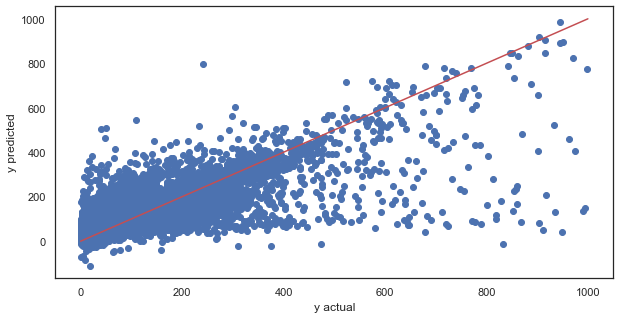

In [48]:
plt.scatter(data['site_eui'], data['estimator'])
x = np.linspace(0, 1000)
plt.plot(x, x, color='r')
plt.ylabel('y predicted')
plt.xlabel('y actual')

Text(0, 0.5, 'y predicted')

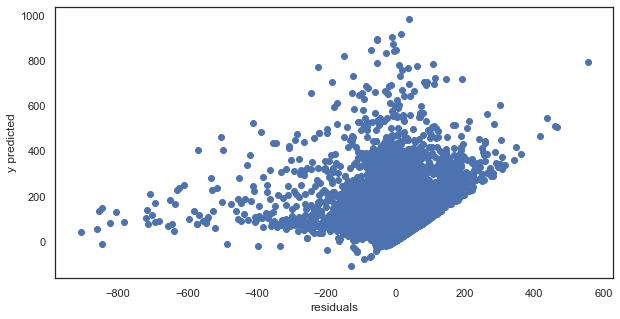

In [49]:
plt.scatter(data['error'], data['estimator'])
plt.xlabel('residuals')
plt.ylabel('y predicted')

Text(0, 0.5, 'y actual')

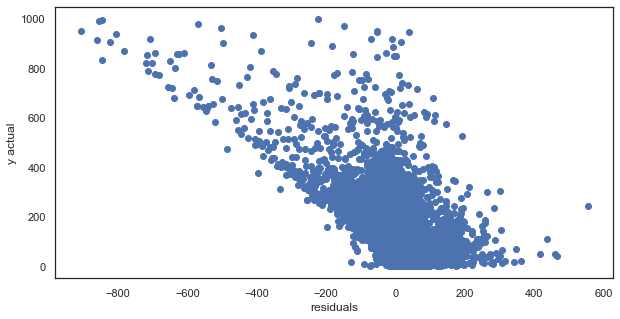

In [50]:
plt.scatter(data['error'],data['site_eui'])
plt.xlabel('residuals')
plt.ylabel('y actual')

In [51]:
pd.set_option('display.max_columns',None)
data.sort_values('absolute error', ascending=False).head(10)

,Year_Factor,State_Factor,building_class,facility_type,energy_star_rating,precipitation_inches,snowfall_inches,avg_temp,site_eui,id,spring,summer,fall,winter,cooling_degree_days_pct,heating_degree_days_pct,days_below_F,days_above_F,age,ELEVATION_log,floor_area_log,estimator,estimator_train_1,estimator_train_2,estimator_train_3,estimator_train_4,estimator_train_5,estimator_train_6,error,absolute error
20326,2,87.481012,85.755239,92.642037,65.343750,38.51,9.6,57.366120,948.758564,20326,56.932975,75.478315,56.905018,39.889878,0.243007,0.756993,27,89,55.0,3.09,11.19,41.316939,533.778666,828.303758,887.929886,859.943226,NaN,620.735811,-907.441626,907.441626
359,2,62.196194,85.755239,46.172799,13.142857,10.43,0.0,64.251366,910.563198,359,60.171685,67.838889,68.846953,60.087319,0.455206,0.544794,0,75,0.0,3.39,8.52,51.247091,63.248429,64.992929,67.888313,74.564608,NaN,63.139041,-859.316107,859.316107
55578,6,87.481012,85.755239,108.629116,52.076923,42.17,36.0,57.215847,989.887978,55578,54.998208,76.701613,60.108244,36.832406,0.259362,0.740638,54,113,92.0,1.22,11.05,134.150143,NaN,786.517581,864.092581,832.522384,775.706561,560.935461,-855.737835,855.737835
28951,3,87.481012,80.240957,83.878522,56.548516,46.32,29.6,55.449315,993.428259,28951,51.972939,75.695161,57.770072,35.846582,0.214069,0.785931,61,86,71.0,2.72,11.32,147.515242,152.327134,350.475402,397.223630,NaN,345.499608,169.617912,-845.913017,845.913017
72545,6,53.989234,85.755239,92.642037,96.000000,106.32,36.6,47.911202,832.156775,72545,47.889068,58.868100,48.698208,36.196515,0.008768,0.991232,28,6,53.0,4.05,10.49,-12.513827,NaN,777.725056,797.929321,788.335422,774.014697,657.081458,-844.670602,844.670602
72672,6,53.989234,80.240957,89.529798,8.000000,45.03,1.4,55.147541,903.667575,72672,54.938351,66.377061,56.023297,43.218762,0.064484,0.935516,6,28,30.0,4.05,13.11,80.920285,NaN,875.597092,884.387082,885.951018,872.979897,753.669834,-822.747290,822.747290
29583,3,87.481012,85.755239,104.934997,16.000000,46.32,29.6,55.449315,935.389315,29583,51.972939,75.695161,57.770072,35.846582,0.214069,0.785931,61,86,99.0,2.72,11.64,130.473728,427.724857,691.464571,768.628177,NaN,702.572700,449.528002,-804.915587,804.915587
29238,3,87.481012,85.755239,77.074389,72.102452,46.32,29.6,55.449315,868.700000,29238,51.972939,75.695161,57.770072,35.846582,0.214069,0.785931,61,86,98.0,2.72,11.78,85.568253,165.072294,329.837913,445.532036,NaN,325.982254,162.747024,-783.131747,783.131747
58018,6,87.481012,80.240957,83.878522,1.000000,42.17,36.0,57.215847,819.853825,58018,54.998208,76.701613,60.108244,36.832406,0.259362,0.740638,54,113,109.0,3.75,12.09,100.875930,NaN,599.374758,659.144190,666.531982,602.152572,409.556283,-718.977895,718.977895
29741,3,87.481012,80.240957,83.878522,56.548516,46.32,29.6,55.449315,853.108200,29741,51.972939,75.695161,57.770072,35.846582,0.214069,0.785931,61,86,83.0,2.72,11.07,137.826139,128.775493,249.535638,224.894083,NaN,257.102963,139.027470,-715.282060,715.282060


<AxesSubplot:xlabel='facility_type', ylabel='error'>

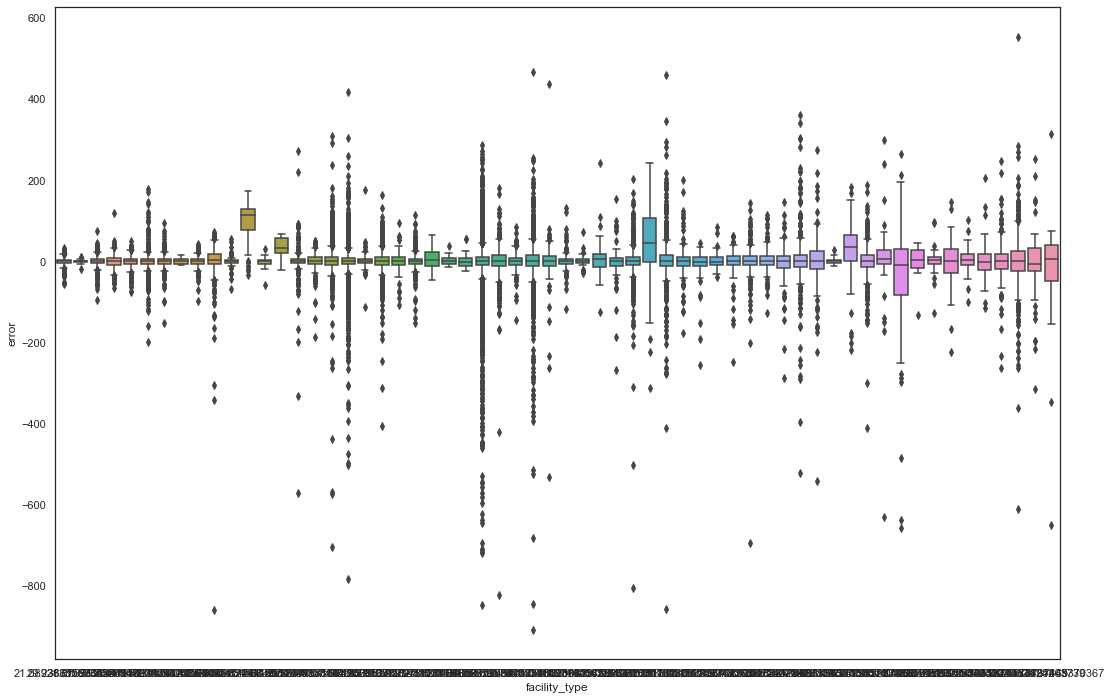

In [52]:
plt.figure(figsize=(18,12))
sns.boxplot(x='facility_type', y='error', data=data)